In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()


np.uint8(9)

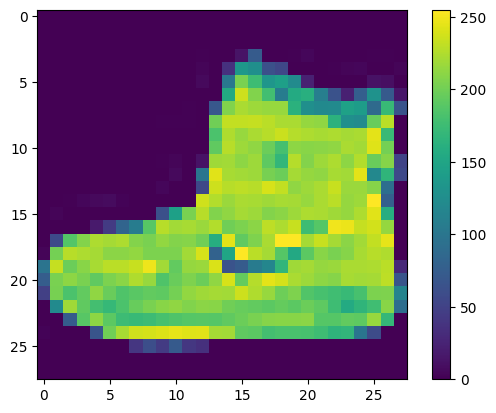

In [5]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()


In [6]:
imagens_treino = imagens_treino/float(255)

In [40]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(learning_rate=0.02)
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.keras',monitor='val_loss', save_best_only=True)
             ]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino,batch_size=150,  epochs=5, validation_split=0.2, callbacks=callbacks)

Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6654 - loss: 1.5892 - val_accuracy: 0.8453 - val_loss: 0.4242
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8126 - loss: 0.5088 - val_accuracy: 0.8430 - val_loss: 0.4274


In [31]:
sumario_modelo = modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
vies_camada_dense = modelo.layers[1].get_weights()[1]

In [23]:
vies_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vies_camada_dense_zerados])

In [11]:
pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_aleatorios = np.random.rand(784, 256)
# modelo.layers[1].set_weights([pesos_camada_dense_zerados, vies_camada_dense])
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vies_camada_dense])
modelo.layers[1].get_weights()

[array([[0.31734958, 0.26252985, 0.5923399 , ..., 0.6827367 , 0.7129977 ,
         0.25168943],
        [0.478037  , 0.91273284, 0.26357135, ..., 0.55057627, 0.7408777 ,
         0.03275282],
        [0.91842604, 0.9436295 , 0.23658653, ..., 0.00164988, 0.2539539 ,
         0.9806849 ],
        ...,
        [0.6657152 , 0.7280597 , 0.00173355, ..., 0.6079076 , 0.44616908,
         0.9325819 ],
        [0.4119845 , 0.5500422 , 0.07338491, ..., 0.3444893 , 0.2604059 ,
         0.12180705],
        [0.5484138 , 0.94863486, 0.0759846 , ..., 0.66356283, 0.14653015,
         0.7567666 ]], dtype=float32),
 array([ 0.31567165,  0.08334903,  0.49543872, -0.04014697,  0.20038025,
         0.24844728, -0.00764296, -0.06875744,  0.13228977, -0.18507288,
         0.21503383, -0.0136868 ,  0.16146305, -0.02559357,  0.11573435,
        -0.00532669,  0.0642659 , -0.00450578,  0.16125873, -0.01106077,
         0.18200897,  0.13522491, -0.1680377 , -0.0094836 ,  0.17877309,
         0.05111511, -0.19151

In [24]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2977 - loss: 38.3033 - val_accuracy: 0.6492 - val_loss: 5.2209
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5424 - loss: 7.8040 - val_accuracy: 0.6474 - val_loss: 3.9185
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6183 - loss: 4.3402 - val_accuracy: 0.6933 - val_loss: 1.9723
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6698 - loss: 2.6853 - val_accuracy: 0.6883 - val_loss: 1.9520
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7190 - loss: 1.7196 - val_accuracy: 0.7977 - val_loss: 0.9814


In [13]:
modelo.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units

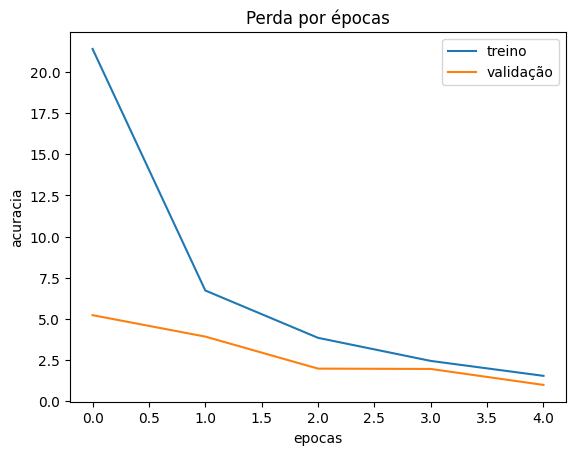

In [25]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perda por épocas")
plt.xlabel("epocas")
plt.ylabel("acuracia")
plt.legend(['treino', 'validação'])

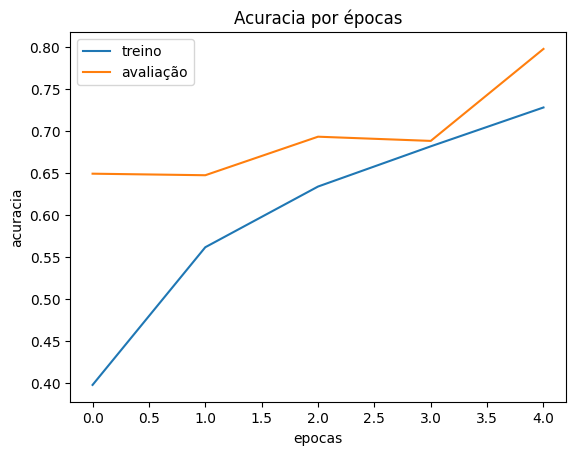

In [26]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acuracia por épocas")
plt.xlabel("epocas")
plt.ylabel("acuracia")
plt.legend(['treino', 'avaliação'])

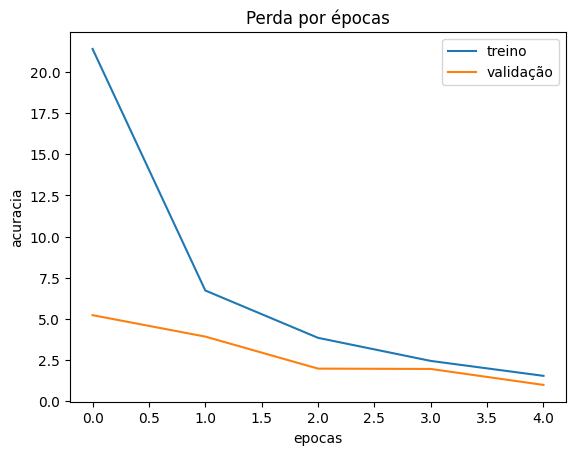

In [27]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perda por épocas")
plt.xlabel("epocas")
plt.ylabel("acuracia")
plt.legend(['treino', 'validação'])

In [17]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes_modelo_salvo[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
resultado teste: 2
número da imagem de teste: 2


NameError: name 'modelo_salvo' is not defined

In [ ]:
from tensorflow.keras.models import load_model
!pip install --upgrade tensorflow keras


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax

custom_objects = {'softmax_v2': softmax}
modelo_salvo = load_model('modelo.h5', custom_objects=custom_objects)

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

